This notebook is used for the stochastic reactions section. 
Note: the velocity autocorrelation stuff is incorrect (namely using the smoothed velocities to advance the particle). I'm sure it's something dumb


http://scipy-cookbook.readthedocs.io/items/BrownianMotion.html

In [1]:
%matplotlib inline

In [72]:
import matplotlib.pylab as plt

In [73]:
def smooth(x,window_len=11):
    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    w=np.ones(window_len,'d')
    #w=np.array([0,1.,2.,3.,0.,0.,0.])
    n=20
    w= np.concatenate([np.arange(n),np.zeros(n-1)])
    y=np.convolve(w/w.sum(),s,mode='valid')
    return y

In [74]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, doSmooth=False,out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))
    if doSmooth:
        rt = r[0]
        rts = smooth(rt,window_len=21)
        r[0] = rt
        

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

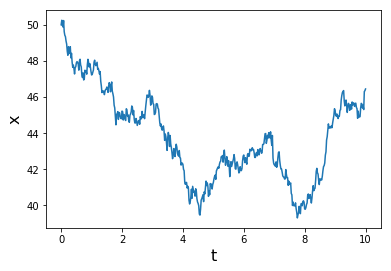

In [75]:
import numpy
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 1
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 50

dummy = brownian(x[:,0], N, dt, delta, doSmooth=True,out=x[:,1:])


t = numpy.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)

This isn't quite doing what I expect'
I intended for the correlated velocities to affect my brownian simualtion, but I don't think I am doing it correctly with the cumsum'

Making simulated data here; 

In [82]:
def GetVACF(x,fakeSmooth=False):
    #  velocity
    x0 = x[0]
    dt=1.
    v = (x0[1:]-x0[:-1])/dt
    if fakeSmooth:
        v = smooth(v)
        print "HACK DO NOT TRUST"

    y = v - np.mean(v)
    norm = np.sum(y ** 2)
    correlated = np.correlate(y, y, mode='full')/norm
    import matplotlib.pylab as plt
    #plt.plot(correlated)
    
    return v, correlated
    #plt.xlim([450,550])

HACK DO NOT TRUST


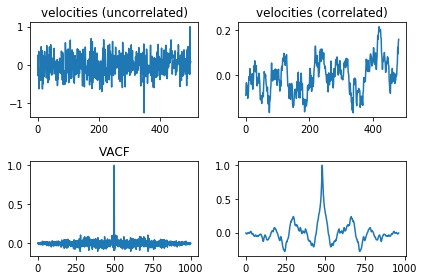

In [90]:
vu,vacfu = GetVACF(x,fakeSmooth=False)
vc,vacfc = GetVACF(x,fakeSmooth=True)

plt.subplot(2,2,1)
plt.title("velocities (uncorrelated)")
plt.plot(vu)
plt.subplot(2,2,3)
plt.title("VACF")
plt.plot(vacfu)

plt.subplot(2,2,2)
plt.title("velocities (correlated)")
plt.plot(vc)
plt.subplot(2,2,4)
plt.plot(vacfc)
plt.tight_layout()

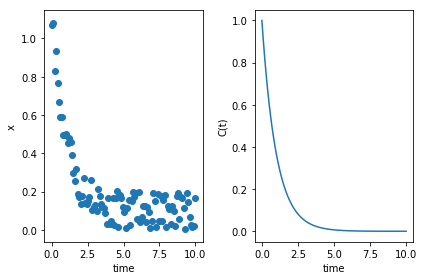

In [105]:

i=100
plt.subplot(1,2,1)
ts=np.linspace(0,10,i)
plt.scatter(ts, 0.2*np.random.rand(i)+np.exp(-ts))

plt.ylabel("x")
plt.xlabel("time")

plt.subplot(1,2,2)
plt.plot(ts, np.exp(-ts))

plt.ylabel("C(t)")
plt.xlabel("time")
plt.tight_layout()

In [106]:
# draw from Poisson distribution

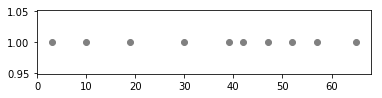

In [115]:
s = np.random.poisson(6,10)
steps = np.cumsum(s)
plt.subplot(3,1,1)
plt.scatter(steps,np.ones(10),c="gray")

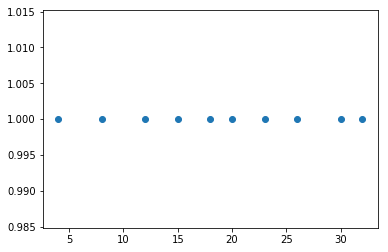